Benjamín Hernández Cortés - viernes 03 de mayo de 2019 


## **Laboratorio 1** - Fundamentos de Aprendizaje Profundo con Redes Neuronales
___

<p style='text-align: justify;'>
El presente código está orientado hacia la implementación de un perceptrón simple o red neuronal de una sola capa (Single-Layer Neural Network). En primera oportunidad, se utilizará el perceptrón para clasificar y emular compuertas lógicas AND, OR y XOR. Luego, se realizará una clasificación trabajando con un conjunto de datos que contiene 3 atributos: un alto, un ancho y una letra asociada.
</p>

#### Importación de bibliotecas
---

Las bibliotecas a emplear son:
- **Numpy:** Herramienta de computación científica, que nos permitirá trabajar a través de vectores
- **Pandas:** Para la manipulación y lectura de datos
- **Matplotlib:** Para la visualización gráfica de diversos datos de interés
- **Itertools:** Como herramienta para iteración de objetos

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools as its

#### Definición de la clase Perceptron 
---

La clase Perceptron permite generar un perceptrón simple inicial sobre el cual trabajar. Requiere de 3 parámetros:
- **data:** Dataframe que contiene la información a ser clasificada y "aprendida"
- **learning_rate:** Valor numérico. Corresponde a la tasa de aprendizaje, cuyo valor debe estar entre $]0, 1[$
- **threshold:** Valor numérico. Representa el umbral de activación

En cuanto a las funciones definidas, se tiene:

| **Función**  | **Descripción**  |
| ------------ | ------------ |
| `predict(data)`  |  Realiza una predicción para un conjunto de datos (*data*), empleando los valores actuales de los pesos (*weights*) asociados al perceptron.|
| `training(n_times)` |  Entrena al perceptrón con los datos entregados durante su inicialización, hasta una cantidad de veces (*n_times*) definida. Como resultado, se entrega un arreglo con la cantidad de errores cometidos durante cada iteración. |



In [56]:
class Perceptron:
    def __init__(self, data, learning_rate, threshold):
        self.data = data
        self.data_nrows = data.shape[0]
        self.data_ncols = data.shape[1]
        self.learning_rate = learning_rate
        self.threshold = threshold
        self.weights = np.array([0] * (self.data_ncols - 1))

        for i in range(self.data_ncols - 1):
            self.weights[i] = np.random.random_sample()
        
    def predict(self, data):
        function_result = np.dot(data, self.weights)
        return 1 if function_result >= self.threshold else 0
    
    def training(self, n_times):
        errors_series = []
        for i in range(n_times):
            errors = 0
            for j in range(self.data_nrows):
                row = self.data.loc[[j]].values[0]
                predicted_value = self.predict( row[:-1] )
                error = row[-1] - predicted_value
                errors += int(error != 0.0)
                self.weights = self.weights + self.learning_rate * error * row[:-1]
            errors_series.append(errors)
        return np.array(errors_series)

#### Definición de la clase TruthTableGenerator
---

La clase TruthTableGenerator permite generar tablas de verdad para 3 tipos de compuertas lógicas: AND, OR y XOR.

En cuanto a las funciones definidas, se tiene:

| **Función**  | **Descripción**  |
| ------------ | ------------ |
| `generate_table(n_inputs, logic_gate)`  |  Genera una tabla de verdad de n-variables (*n_inputs*), basada en una compuerta lógica determinada (*logic_gate*)|

In [57]:
class TruthTableGenerator():
    
    def generate_table(n_inputs, logic_gate):
        table = its.product([0,1], repeat = n_inputs)
        table = pd.DataFrame(table)
        results = []
        
        if logic_gate == 'AND':
            for i in range(n_inputs ** 2):
                row = table.loc[[i]].values[0]
                results.append( all(row) )
            
        elif logic_gate == 'OR':
            for i in range(n_inputs ** 2):
                row = table.loc[[i]].values[0]
                results.append( any(row) )
                    
        elif logic_gate == 'XOR':
            for i in range(n_inputs ** 2):
                row = table.loc[[i]].values[0]
                tmp_result = row[0] ^ row[1]
                for j in range(2, n_inputs):
                    tmp_result = tmp_result ^ row[j]
                results.append( tmp_result )
        
        else:
            return None
        
        table['result'] = results
        return table

### **Actividad 1:** Perceptron Simple aplicado para compuertas lógicas AND, OR y XOR
---

#### Generación de tablas de verdad para cada caso.

In [58]:
table_AND = TruthTableGenerator.generate_table(n_inputs = 4, logic_gate = 'AND')
table_OR  = TruthTableGenerator.generate_table(n_inputs = 4, logic_gate = 'OR')
table_XOR = TruthTableGenerator.generate_table(n_inputs = 4, logic_gate = 'XOR')

#### Generación y entrenamiento de perceptrones para cada compuerta lógica.

In [59]:
perceptron_AND = Perceptron(data = table_AND, learning_rate = 0.05, threshold = 1.5)
perceptron_OR  = Perceptron(data = table_OR , learning_rate = 0.05, threshold = 0.5)
perceptron_XOR = Perceptron(data = table_XOR, learning_rate = 0.05, threshold = 2.5)

errors_AND = perceptron_AND.training(50)
errors_OR  = perceptron_OR.training(50)
errors_XOR = perceptron_XOR.training(50)

#### Visualización y evolución del error.

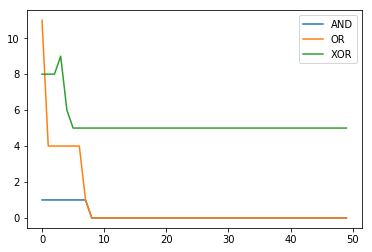

In [60]:
plt.plot(errors_AND, label='AND')
plt.plot(errors_OR, label='OR')
plt.plot(errors_XOR, label='XOR')
plt.legend()
plt.show()

### **Actividad 2:** Perceptron Simple aplicado al dataset 'letters.csv'
---

#### Pre-procesamiento de los datos

In [61]:
data = pd.read_csv(filepath_or_buffer = 'letters.csv', sep = ",", header = None)
data.columns = ['largo', 'ancho', 'letra']
data = data.replace(to_replace = ['o', 'l'], value = [0,1])

#### Generación y entrenamiento del Perceptrón

In [ ]:
perceptron_numeros = Perceptron(data = data, learning_rate = 0.05, threshold = 1.5)
errors_numeros = perceptron_numeros.training(200)

#### Visualización y evolución del error

In [ ]:
plt.plot(errors_numeros, label='Clasificacion')
plt.legend()
plt.ylim(bottom = 0.0)
plt.show()

### Análisis y conclusiones

<p style='text-align: justify;'>
En cuánto al gráfico resultante de la primera actividad, es posible observar que los perceptrones con compuerta lógica AND y OR logran ser entrenados hasta no cometer errores, requiriendo de aproximadamente 10 iteraciones para alcanzar tal objetivo. Sin embargo, el perceptrón XOR no es capaz de eliminar el error por completo, debido a que sus resultados no son linealmente separables (a diferencia de los otros casos), por lo que en el mejor de los casos logró predecir correctamente las salidas, a excepción de 5 casos particulares.
</p>

<p style='text-align: justify;'>
Por el lado del perceptrón implementado para el conjunto de datos 'letters.csv', se presenta un caso relativamente similar al del perceptrón XOR, dado que a pesar de ser entrenado 200 veces, el error no logra ser eliminado por completo. Tal como se aprecia en el gráfico, durante las primeras iteraciones el perceptrón comete muchos errores de predicción, algo esperable dado que no ha tenido contacto alguno con el conjunto de datos. Una vez que se acerca a la iteración 50, el perceptrón adquiere una estabilidad con 7 errores como mínimo, sin embargo, el error aumenta y disminuye constantemente en 1 unidad, una vez que el entrenamiento se aproxima a la iteración 75. Por lo tanto, el dataset 'letters.csv' no es linealmente separable, al igual que el perceptrón XOR de la actividad anterior.
</p>

<p style='text-align: justify;'>
La asignación del umbral de cada perceptrón se realizó a partir de la función discriminante lineal ($g(u)$) empleada. La teoría dice que cuando $g(u) = x_1 * w_1 + x_2 * w_2 + ... x_n * w_n + w_{n+1}= 0$, corresponde al hiperplano que separa a las dos clases. Si se aplica esta ecuación para el perceptrón AND, se obtiene un umbral adecuado para separas las clases con valor de 1.5, mientras que para el perceptrón OR, un valor para el umbral de 0.5 resulta adecuado para separas las clases.
</p>

<p style='text-align: justify;'>
En el caso del perceptrón XOR y el perceptrón del dataset 'letters.csv', esta ecuación no resulta conveniente dado que los datos no son linealmente separables, por lo que se asigno un umbral de forma totalmente aleatoria.
</p>